# Prediction for subdivision, month, year

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NIT Hackathon/rainfall in india 1901-2015.csv")

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
df.drop(labels=['ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],axis=1,inplace=True)

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [ ]:
final_df= pd.DataFrame(columns=['subdivision','year','month','rainfall'])
final_df

,subdivision,year,month,rainfall


In [ ]:
for i in range(len(df)):
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':1,'rainfall':df.loc[i,'JAN']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':2,'rainfall':df.loc[i,'FEB']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':3,'rainfall':df.loc[i,'MAR']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':4,'rainfall':df.loc[i,'APR']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':5,'rainfall':df.loc[i,'MAY']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':6,'rainfall':df.loc[i,'JUN']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':7,'rainfall':df.loc[i,'JUL']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':8,'rainfall':df.loc[i,'AUG']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':9,'rainfall':df.loc[i,'SEP']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':10,'rainfall':df.loc[i,'OCT']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':11,'rainfall':df.loc[i,'NOV']}, ignore_index = True)
      final_df = final_df.append({'subdivision':df.loc[i,'SUBDIVISION'], 'year':df.loc[i,'YEAR'],'month':12,'rainfall':df.loc[i,'DEC']}, ignore_index = True)

In [ ]:
final_df.head(10)

,subdivision,year,month,rainfall
0,ANDAMAN & NICOBAR ISLANDS,1901,1,49.2
1,ANDAMAN & NICOBAR ISLANDS,1901,2,87.1
2,ANDAMAN & NICOBAR ISLANDS,1901,3,29.2
3,ANDAMAN & NICOBAR ISLANDS,1901,4,2.3
4,ANDAMAN & NICOBAR ISLANDS,1901,5,528.8
5,ANDAMAN & NICOBAR ISLANDS,1901,6,517.5
6,ANDAMAN & NICOBAR ISLANDS,1901,7,365.1
7,ANDAMAN & NICOBAR ISLANDS,1901,8,481.1
8,ANDAMAN & NICOBAR ISLANDS,1901,9,332.6
9,ANDAMAN & NICOBAR ISLANDS,1901,10,388.5


In [ ]:
from google.colab import files

final_df.to_csv('rainfall_processed.csv')
files.download('rainfall_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=final_df

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['subdivision']= label_encoder.fit_transform(df['subdivision'])

In [ ]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'ANDAMAN & NICOBAR ISLANDS': 0, 'ARUNACHAL PRADESH': 1, 'ASSAM & MEGHALAYA': 2, 'BIHAR': 3, 'CHHATTISGARH': 4, 'COASTAL ANDHRA PRADESH': 5, 'COASTAL KARNATAKA': 6, 'EAST MADHYA PRADESH': 7, 'EAST RAJASTHAN': 8, 'EAST UTTAR PRADESH': 9, 'GANGETIC WEST BENGAL': 10, 'GUJARAT REGION': 11, 'HARYANA DELHI & CHANDIGARH': 12, 'HIMACHAL PRADESH': 13, 'JAMMU & KASHMIR': 14, 'JHARKHAND': 15, 'KERALA': 16, 'KONKAN & GOA': 17, 'LAKSHADWEEP': 18, 'MADHYA MAHARASHTRA': 19, 'MATATHWADA': 20, 'NAGA MANI MIZO TRIPURA': 21, 'NORTH INTERIOR KARNATAKA': 22, 'ORISSA': 23, 'PUNJAB': 24, 'RAYALSEEMA': 25, 'SAURASHTRA & KUTCH': 26, 'SOUTH INTERIOR KARNATAKA': 27, 'SUB HIMALAYAN WEST BENGAL & SIKKIM': 28, 'TAMIL NADU': 29, 'TELANGANA': 30, 'UTTARAKHAND': 31, 'VIDARBHA': 32, 'WEST MADHYA PRADESH': 33, 'WEST RAJASTHAN': 34, 'WEST UTTAR PRADESH': 35}


In [ ]:
df.head()

,subdivision,year,month,rainfall
0,0,1901,1,49.2
1,0,1901,2,87.1
2,0,1901,3,29.2
3,0,1901,4,2.3
4,0,1901,5,528.8


In [ ]:
df.isnull().sum()

subdivision     0
year            0
month           0
rainfall       70
dtype: int64

In [ ]:
len(df)

49392

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

subdivision    0
year           0
month          0
rainfall       0
dtype: int64

In [ ]:
X = df.drop("rainfall", axis=1)
y = df["rainfall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Random Forest

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-Squared Score: ", r2)

Mean Squared Error:  6725.6955905079585
R-Squared Score:  0.785001648878989


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  6725.6955905079585
RMSE:  82.01033831480004


In [ ]:
accuracy=regressor.score(X_test,y_test)
accuracy

0.785001648878989

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
87.0
-----------Testing Accuracy------------
80.5


In [ ]:
from sklearn import metrics

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 44.68652704433797
MSE: 6095.458128746644
RMSE: 78.07341499349599

-------Train Data--------
MAE: 36.69432004889819
MSE: 4051.6316364862028
RMSE: 63.65242836283784


In [ ]:
import pickle
# Dump the trained classifier with Pickle
RF_pkl_filename = '/content/drive/MyDrive/NIT Hackathon/RandomForest_subdivision.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(random_forest_model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
y_predict=random_forest_model.predict([[34,2023,1]])
y_predict

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14.36133518])

# Prediction for month, year

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data1 = pd.read_csv("drive/MyDrive/TRI-NIT_hackathon/NIT Hackathon/Crop_recommendation.csv")

#Data Pre-Processing
label_encoder = preprocessing.LabelEncoder()
data1['label']= label_encoder.fit_transform(data1['label'])

data1['label'].unique()

# Separate the features and target variables
X = data1.drop("label", axis=1)
y = data1["label"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-Squared Score: ", r2)


Mean Squared Error:  2.3984004545454547
R-Squared Score:  0.9433322709997705


In [ ]:
import os
os.listdir('drive/MyDrive/TRI-NIT_hackathon')

['college_id', 'NIT Hackathon']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("drive/MyDrive/TRI-NIT_hackathon/NIT Hackathon/rainfall in india 1901-2015.csv")

print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)

Data heads:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
print("Info:")
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtype

In [ ]:
data["SUBDIVISION"].nunique()

36

In [ ]:
group = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df=group.get_group(('VIDARBHA'))
df.head()

<ipython-input-37-9b093aa0cad0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2852,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0
2853,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7
2854,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0
2855,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9
2856,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0


In [ ]:
df2=df.melt(['YEAR']).reset_index()
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,36.8
115,115,1901,FEB,39.9
230,230,1901,MAR,30.9
345,345,1901,APR,26.1
460,460,1901,MAY,7.3


In [ ]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [ ]:
df2.columns=['Index','Year','Month','Avg_Rainfall']
df2.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,36.8
115,115,1901,FEB,39.9
230,230,1901,MAR,30.9
345,345,1901,APR,26.1
460,460,1901,MAY,7.3


In [ ]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,36.8
115,115,1901,2,39.9
230,230,1901,3,30.9
345,345,1901,4,26.1
460,460,1901,5,7.3
575,575,1901,6,129.7
690,690,1901,7,295.3
805,805,1901,8,368.8
920,920,1901,9,123.4
1035,1035,1901,10,35.2


In [ ]:
df2.drop(columns="Index",inplace=True)

KeyError: ignored

In [ ]:
df2.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,36.8
115,1901,2,39.9


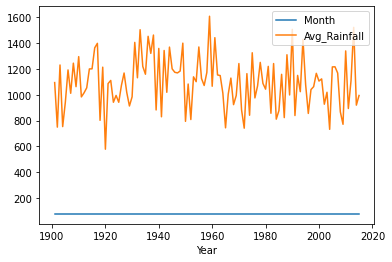

In [ ]:
from matplotlib import pyplot as plt
df2.groupby("Year").sum().plot()
plt.show()

In [ ]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [ ]:
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [ ]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 102.15453952323351
MSE: 16248.327064937163
RMSE: 127.46892587974986
Explained Variance Score: 0.027561502102628865 2

-------Train Data--------
MAE: 95.80008074338575
MSE: 14657.15403937771
RMSE: 121.06673382633939

-----Training Accuracy-------
4.3999999999999995
-----Testing Accuracy--------
2.5


In [ ]:
predicted = LR.predict([[2014,2]])

In [ ]:
predicted

array([57.08007399])

##random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 37.930719001410615
MSE: 3275.0537055338955
RMSE: 57.228084936802624

-------Train Data--------
MAE: 28.441269538191516
MSE: 2015.5492169714028
RMSE: 44.89486849263959


In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
86.9
-----------Testing Accuracy------------
80.30000000000001


In [ ]:
predicted = random_forest_model.predict([[2023,2]])
predicted

array([24.37620142])

In [ ]:
import pickle
# Dump the trained classifier with Pickle
RF_pkl_filename = 'drive/MyDrive/TRI-NIT_hackathon/NIT Hackathon/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(random_forest_model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

##SVM

In [ ]:
from sklearn import svm
svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVC()

In [ ]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.98188405797102
MSE: 26265.097826086956
RMSE: 162.0651036654312

-------Train Data--------
MAE: 89.10054347826087
MSE: 23271.352355072464
RMSE: 152.54950788210516


In [ ]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
16.5
-----------Testing Accuracy------------
15.9


##logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced', max_iter=10000)
logreg = LogisticRegression(random_state=0,solver='lbfgs')
logreg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_train_predict=logreg.predict(X_train)
y_test_predict=logreg.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.91304347826087
MSE: 26262.463768115944
RMSE: 162.05697691897115

-------Train Data--------
MAE: 89.01811594202898
MSE: 23267.681159420288
RMSE: 152.53747460680043


In [ ]:
print("-----------Training Accuracy------------")
print(round(logreg.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(logreg.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
13.8
-----------Testing Accuracy------------
14.099999999999998


##xgboost

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[03:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 35.95638229492782
MSE: 3126.6049451982008
RMSE: 55.91605266109367

-------Train Data--------
MAE: 30.091724128826804
MSE: 2271.6101114506964
RMSE: 47.661411135746874


In [ ]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
85.2
-----------Testing Accuracy------------
81.2


##gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 36.10672976114717
MSE: 3159.517209372033
RMSE: 56.20958289626452

-------Train Data--------
MAE: 30.03727370241004
MSE: 2244.7820389912495
RMSE: 47.37913083828416


In [ ]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
85.39999999999999
-----------Testing Accuracy------------
81.0


In [ ]:
predicted = random_forest_model.predict([[2023,2]])
predicted

array([23.03941179])

In [ ]:
import pickle
# Dump the trained classifier with Pickle
RF_pkl_filename = 'drive/MyDrive/TRI-NIT_hackathon/NIT Hackathon/GBRegressor.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(gbr, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

#ensemble stacking

In [ ]:
#The stacked model with meta learner = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)

stack.fit(X_train, y_train)

[03:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=12, meta_regressor=XGBRegressor(),
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 37.2581679078116
MSE: 3617.1401823645374
RMSE: 60.142665241611446

-------Train Data--------
MAE: 32.66365479991056
MSE: 2732.077857128062
RMSE: 52.269282156234574


In [ ]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
82.19999999999999
-----------Testing Accuracy------------
78.3


In [ ]:
predicted = stack.predict([[2023,2]])
predicted

array([34.251778], dtype=float32)

# States - subcode

In [ ]:
df = pd.read_csv("/content/india-states.csv")
df.head()

,state,Subdivison,Sub_Code
0,Andhra Pradesh,COASTAL ANDHRA PRADESH,5
1,Arunachal Pradesh,ARUNACHAL PRADESH,1
2,Assam,ASSAM & MEGHALAYA,2
3,Bihar,BIHAR,3
4,Chhattisgarh,CHHATTISGARH,4


In [ ]:
df.drop(labels=['Subdivison'],axis=1,inplace=True)

In [ ]:
df.head()

,state,Sub_Code
0,Andhra Pradesh,5
1,Arunachal Pradesh,1
2,Assam,2
3,Bihar,3
4,Chhattisgarh,4


In [ ]:
data_dict = df.to_dict()

In [ ]:
data_dict

{'state': {0: 'Andhra Pradesh',
  1: 'Arunachal Pradesh',
  2: 'Assam',
  3: 'Bihar',
  4: 'Chhattisgarh',
  5: 'Goa',
  6: 'Gujarat',
  7: 'Haryana',
  8: 'Himachal Pradesh',
  9: 'Jammu and Kashmir',
  10: 'Jharkhand',
  11: 'Karnataka',
  12: 'Kerala',
  13: 'Madhya Pradesh',
  14: 'Maharashtra',
  15: 'Manipur',
  16: 'Meghalaya',
  17: 'Mizoram',
  18: 'Nagaland',
  19: 'Odisha',
  20: 'Punjab',
  21: 'Rajasthan',
  22: 'Sikkim',
  23: 'Tamil Nadu',
  24: 'Telangana',
  25: 'Tripura',
  26: 'Uttarakhand',
  27: 'Uttar Pradesh',
  28: 'West Bengal',
  29: 'Andaman and Nicobar Islands',
  30: 'Chandigarh',
  31: 'Dadra and Nagar Haveli',
  32: 'Daman and Diu',
  33: 'Delhi',
  34: 'Lakshadweep',
  35: 'Puducherry'},
 'Sub_Code': {0: 5,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 17,
  6: 11,
  7: 12,
  8: 13,
  9: 14,
  10: 15,
  11: 6,
  12: 16,
  13: 33,
  14: 19,
  15: 21,
  16: 2,
  17: 21,
  18: 21,
  19: 23,
  20: 24,
  21: 34,
  22: 28,
  23: 29,
  24: 30,
  25: 21,
  26: 31,
  27: 

In [ ]:
sub_code=data_dict['Sub_Code']
state=data_dict['state']

dict_subcode={}
for i in range(0,36):
  dict_subcode[state[i]]=sub_code[i]

dict_subcode

{'Andhra Pradesh': 5,
 'Arunachal Pradesh': 1,
 'Assam': 2,
 'Bihar': 3,
 'Chhattisgarh': 4,
 'Goa': 17,
 'Gujarat': 11,
 'Haryana': 12,
 'Himachal Pradesh': 13,
 'Jammu and Kashmir': 14,
 'Jharkhand': 15,
 'Karnataka': 6,
 'Kerala': 16,
 'Madhya Pradesh': 33,
 'Maharashtra': 19,
 'Manipur': 21,
 'Meghalaya': 2,
 'Mizoram': 21,
 'Nagaland': 21,
 'Odisha': 23,
 'Punjab': 24,
 'Rajasthan': 34,
 'Sikkim': 28,
 'Tamil Nadu': 29,
 'Telangana': 30,
 'Tripura': 21,
 'Uttarakhand': 31,
 'Uttar Pradesh': 35,
 'West Bengal': 28,
 'Andaman and Nicobar Islands': 0,
 'Chandigarh': 12,
 'Dadra and Nagar Haveli': 11,
 'Daman and Diu': 11,
 'Delhi': 12,
 'Lakshadweep': 18,
 'Puducherry': 29}

# States - NKP

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("/content/soil.csv")

In [ ]:
df.head()

,state,Type of Soil,N,K,P
0,Andhra Pradesh,Black,medium,high,low
1,Arunachal Pradesh,Mountain,medium,low,low
2,Assam,Alluvial,high,high,low
3,Bihar,Peaty,low,low,high
4,Chhattisgarh,Red sandy,low,high,low


In [ ]:
df.columns

Index(['state', 'Type of Soil ', 'N', 'K', 'P'], dtype='object')

In [ ]:
df.drop(labels=['Type of Soil '],axis=1,inplace=True)

In [ ]:
numeric_var = {'N': {'low':0, 'medium':1, 'high':2},'P':{'low':0, 'medium':1, 'high':2}, 'K': {'low':0, 'medium':1, 'high':2}}
df = df.replace(numeric_var)

In [ ]:
df.head()

,state,N,K,P
0,Andhra Pradesh,1,2,0
1,Arunachal Pradesh,1,0,0
2,Assam,2,2,0
3,Bihar,0,0,2
4,Chhattisgarh,0,2,0


In [ ]:
data_dict = df.to_dict()
state=data_dict['state']
N=data_dict['N']
K=data_dict['K']
P=data_dict['P']

In [ ]:
import string

state_NKP={}
for i in range(0,36):
  state_NKP[state[i].lower()]=[N[i],K[i],P[i]]

state_NKP

{'andhra pradesh': [1, 2, 0],
 'arunachal pradesh': [1, 0, 0],
 'assam': [2, 2, 0],
 'bihar': [0, 0, 2],
 'chhattisgarh': [0, 2, 0],
 'goa': [0, 2, 1],
 'gujarat': [1, 2, 0],
 'haryana': [0, 2, 1],
 'himachal pradesh': [2, 1, 0],
 'jammu and kashmir': [1, 2, 1],
 'jharkhand': [0, 0, 0],
 'karnataka': [1, 2, 0],
 'kerala': [0, 2, 1],
 'madhya pradesh': [1, 2, 0],
 'maharashtra': [1, 2, 0],
 'manipur': [0, 0, 0],
 'meghalaya': [2, 1, 0],
 'mizoram': [2, 1, 0],
 'nagaland': [2, 0, 0],
 'odisha': [1, 1, 0],
 'punjab': [1, 2, 0],
 'rajasthan': [0, 0, 1],
 'sikkim': [1, 0, 0],
 'tamil nadu': [2, 2, 1],
 'telangana': [0, 2, 0],
 'tripura': [1, 1, 0],
 'uttarakhand': [2, 2, 1],
 'uttar pradesh': [2, 1, 0],
 'west bengal': [2, 2, 0],
 'andaman and nicobar islands': [2, 1, 0],
 'chandigarh': [1, 2, 0],
 'dadra and nagar haveli': [1, 2, 1],
 'daman and diu': [1, 2, 0],
 'delhi': [2, 1, 0],
 'lakshadweep': [0, 1, 1],
 'puducherry': [2, 2, 2]}